# A look at "level 2 plus" data #

Datasets with a number of pre-processings done are available. Some corrections are provided for applications which may need alternate models or datasets. 

** Import libraries **

In [1]:
import os
import numpy as np
from netCDF4 import Dataset
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap

plt.rcParams["figure.figsize"] = (16,10)
plt.ioff()

** Along-track "level2P" data ** (i.e. data pre-computed over ocean for SLA)

note that the track is the same than in previous exercise. 

In [2]:
# look at the data (e.g. a Saral file, during drifting phase)
input_root = '../data/'
input_path = ''
input_file = 'global_sla_l2p_ntc_s3a_C0021_P0050_20170809T144624_20170809T153306_20171005T180516.nc'
my_file  = os.path.join(input_root,input_path,input_file)
nc = Dataset(my_file, 'r')

for variable in nc.variables:
    print(variable)

time
latitude
longitude
altitude
range
wet_tropospheric_correction
wet_tropospheric_correction_model
dry_tropospheric_correction_model
dynamic_atmospheric_correction
ocean_tide_height
solid_earth_tide
pole_tide
sea_state_bias
ionospheric_correction
mean_sea_surface
sea_level_anomaly
inter_mission_bias
validation_flag


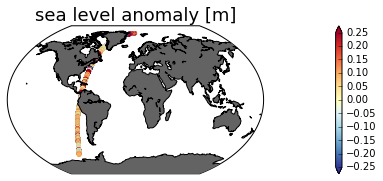

In [3]:
# map the data
lat = nc.variables['latitude'][:]
lon = nc.variables['longitude'][:]
sla = nc.variables['sea_level_anomaly'][:]

m = Basemap(projection='kav7',lon_0=0,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='#636363')
x, y = m(lon, lat)
scatter = m.scatter(x, y, c=sla, cmap='RdYlBu_r', vmin=-0.25, vmax=0.25, marker='o', edgecolors='black', linewidth=0.01)
cb = m.colorbar(scatter, pad=1, size='2.5%', extend='both')
plt.title('sea level anomaly [m]', size=18)
plt.show()

** Use of the "validation" flag **

A flag is provided within the variables of the file which can be used to remove e.g. spurious data.
Note that this track crosses the Gulf Stream, so high variability is to be expected. 

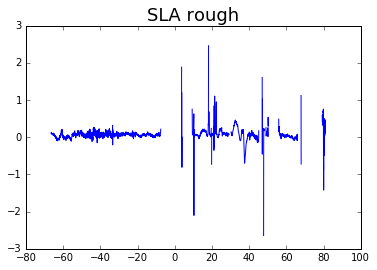

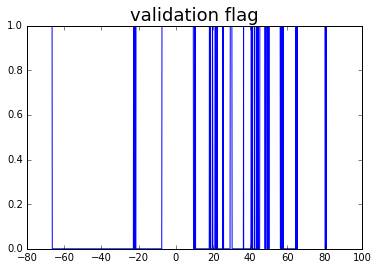

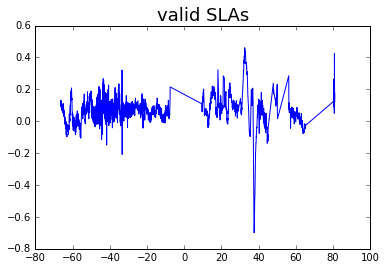

In [4]:
validation_flag = nc.variables['validation_flag'][:]
fig1 = plt.figure()
plt.title('SLA rough', size=18);
plt.plot(lat, sla)

fig2 = plt.figure()
plt.title('validation flag', size=18);
plt.plot(lat, validation_flag)

time_index = np.where(validation_flag == 0 )
fig3 = plt.figure()
plt.title('valid SLAs', size=18);
plt.plot(lat[time_index], sla[time_index])
plt.show()